# Review with bank marketing data

## Introduction

- Data from the UCI Machine Learning Repository: [data](https://github.com/sinanuozdemir/sfdat22/blob/master/data/bank.csv), [data dictionary](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
- **Goal:** Predict whether a customer will purchase a bank product marketed over the phone
- `bank.csv` is already in our repo, so there is no need to download the data from the UCI website

## Step 1: Read the data into Pandas

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
bank = pd.read_csv('../data/bank.csv', sep=';')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [6]:
bank.shape

(4119, 21)

In [7]:
# Do we have any null values?
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Step 2: Prepare at least three features

- Include both numeric and categorical features
- Choose features that you think might be related to the response (based on intuition or exploration)
- Think about how to handle missing values (encoded as "unknown")

In [8]:
# list all columns (for reference)
bank.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'duration', u'campaign',
       u'pdays', u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y'],
      dtype='object')

### y (response)

In [9]:
# convert the response to numeric values and store as a new column called "outcome"
bank['outcome'] = bank.y.map({'no':0, 'yes':1})
bank['outcome'].head()

0    0
1    0
2    0
3    0
4    0
Name: outcome, dtype: int64

Let's explore a few columns manually and visually

### age

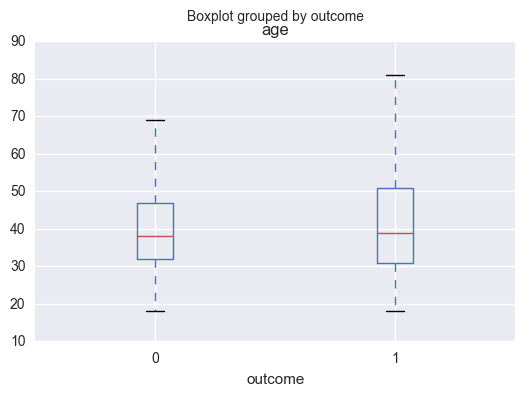

In [10]:
# Exercise!
# create a boxplot of age the data by outcome
# TODO
bank.boxplot(column='age',by='outcome')

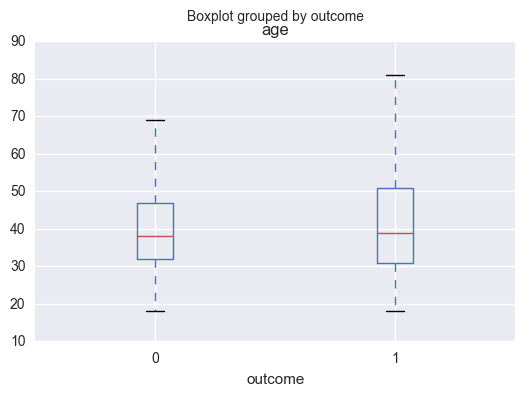

In [11]:
# Solution
bank.boxplot(column='age', by='outcome')
# probably not a great feature, why?


### job

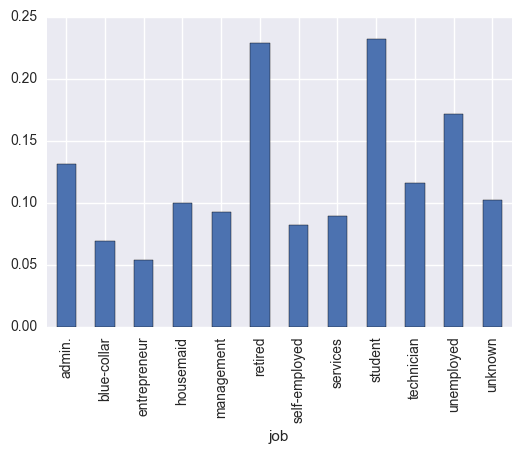

In [12]:
# looks like a useful feature
bank.groupby('job').outcome.mean().plot(kind='bar')
# Ask yourself, WHY is this going to be useful?

In [13]:
# create job_dummies (we will add it to the bank DataFrame later)
job_dummies = pd.get_dummies(bank.job, prefix='job')
# removing the first job from the list (making it k-1 columns) where k is the number of jobs
job_dummies.drop(job_dummies.columns[0], axis=1, inplace=True)
job_dummies.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### default

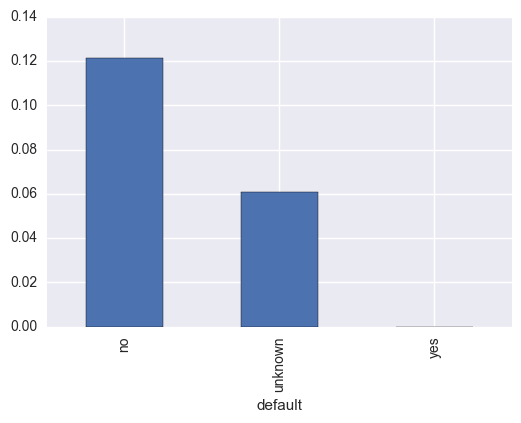

In [14]:
# looks like a useful feature
bank.groupby('default').outcome.mean().plot(kind='bar')

In [15]:
# Exercise! 
# How many people have a value of no, yes, and unknown?
# TODO
bank.groupby('default').outcome.value_counts()

default  outcome
no       0          2913
         1           402
unknown  0           754
         1            49
yes      0             1
Name: outcome, dtype: int64

In [24]:
list(set(bank.default))

['unknown', 'yes', 'no']

In [ ]:
# Solution!
bank.default.value_counts()
# only one person in the dataset has a status of yes

In [ ]:
# So, let's treat this as a 2-class feature rather than a 3-class feature
bank['default'] = bank.default.map({'no':0, 'unknown':1, 'yes':1})
bank.head()

### contact

contact
cellular     0.141403
telephone    0.051806
Name: outcome, dtype: float64

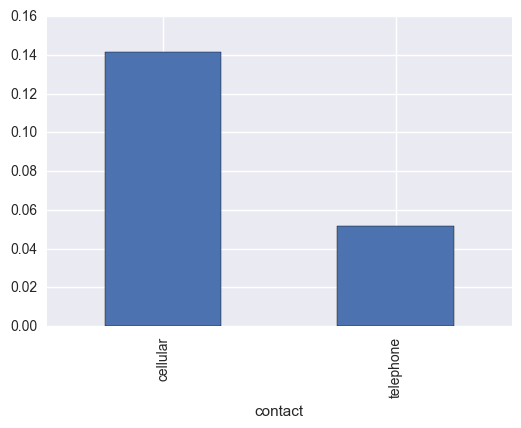

In [32]:
# looks like a useful feature
bank.groupby('contact').outcome.mean().plot(kind='bar')
bank.groupby('contact').outcome.mean()

In [ ]:
# Exercise! 
# Convert the feature to numeric values, 0 for cellular, 1 for telephone
# TODO
bank['contact'] = bank.default.map({'no':0, 'telephone':1})
print "\n"*20

In [33]:
# Solution!
bank['contact'] = bank.contact.map({'cellular':0, 'telephone':1})
bank.groupby('contact').outcome.mean()

contact
0    0.141403
1    0.051806
Name: outcome, dtype: float64

### month

In [34]:
# looks like a useful feature at first glance
bank.groupby('month').outcome.mean()

month
apr    0.167442
aug    0.100629
dec    0.545455
jul    0.082982
jun    0.128302
mar    0.583333
may    0.065312
nov    0.096413
oct    0.362319
sep    0.406250
Name: outcome, dtype: float64

In [105]:
int_months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
index_four=int_months[3]
last = len(int_months)
last_value=int_months[last-1]
print(index_four)

4


In [86]:
# but, it looks like their success rate is actually just correlated with number of calls
# thus, the month feature is unlikely to generalize
df = bank.groupby('month').outcome.agg(['count', 'mean']).sort('count')
df

# plt.plot(df)

C:\Users\Eugene\Anaconda2\envs\bersonenv\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,count,mean
month,,
dec,22,0.545455
mar,48,0.583333
sep,64,0.406250
oct,69,0.362319
apr,215,0.167442
nov,446,0.096413
jun,530,0.128302
aug,636,0.100629
jul,711,0.082982


In [ ]:
bank.groupby('month').outcome.agg(['count', 'mean']).sort('count').corr()

### duration

In [ ]:
# looks like an excellent feature, can you think of a reason why duration isn't helpful in practice?
bank.boxplot(column='duration', by='outcome')

In [ ]:
# Answer: You can't know the duration of a call beforehand, thus it can't be used in your model

### previous

In [ ]:
# looks like a useful feature
bank.groupby('previous').outcome.mean()

### poutcome

In [ ]:
# looks like a useful feature
bank.groupby('poutcome').outcome.mean()

In [ ]:
# create poutcome_dummies
poutcome_dummies = pd.get_dummies(bank.poutcome, prefix='poutcome')
poutcome_dummies.drop(poutcome_dummies.columns[0], axis=1, inplace=True)

In [ ]:
# concatenate bank DataFrame with job_dummies and poutcome_dummies
bank = pd.concat([bank, job_dummies, poutcome_dummies], axis=1)

### euribor3m

In [ ]:
# looks like an excellent feature
bank.boxplot(column='euribor3m', by='outcome')

## Step 3: Model building

- Use cross-validation to evaluate the AUC of a logistic regression model with your chosen features
- Try to increase the AUC by selecting different sets of features

In [ ]:
# new list of columns (including dummy columns)
bank.columns

In [ ]:
# create X (including 13 dummy columns)
feature_cols = ['default', 'contact', 'previous', 'euribor3m'] + list(bank.columns[-13:])
X = bank[feature_cols]

In [ ]:
# create y
y = bank.outcome

In [ ]:
# Exercise! 
# calculate cross-validated Accuracy for logisic regression, and knn with 5 neighbors
# TODO
print "\n"*20

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Solution!
logreg = LogisticRegression()
cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean()

In [ ]:
knn = KNeighborsClassifier(5)
cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()

In [ ]:
# Exercise! 
# use grid search to try k in range from 1-29 (odd only) for knn, and graph the accuracy from a cross val score vs the k
# TODO
print "\n"*20

In [ ]:
# Solution!
from sklearn.grid_search import GridSearchCV
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 29, 2)}
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)

In [ ]:
grid_mean_scores = [result[1] for result in grid.grid_scores_]
plt.figure()
plt.plot(range(1, 29, 2), grid_mean_scores)

In [ ]:
grid.best_estimator_

In [ ]:
# look's like adding to k after 5 doesn't even help that much....

In [ ]:
# Exercise! 
# Create a confusion matrix from the best estimator in the gridsearch and find the accuracy, sensitivity, and specificity
# TODO
print "\n"*20

In [ ]:
# Solution! 
from sklearn import metrics
preds = grid.best_estimator_.predict(X)
print metrics.confusion_matrix(y, preds)
# Accuracy = (3625  + 100) / 4119  == .904
# Sensitivity = 100 / (100 + 351)  == .222
# Specificity = 3625 / (3625 + 43) == .988

In [ ]:
# Exercise! 
# Compare the accuracy to the null accuracy rate
# TODO
print "\n"*20

In [ ]:
# Solution!

null_accuracy_rate = bank['outcome'].value_counts()[0] / float(bank.shape[0])
null_accuracy_rate
# accuracy is greater than the null accuracy rate!

In [ ]:
# What can we do to make the model better?

# Thought Experiment

What if we want to regress to the duration of the call so the rep can better plan their day?

In [ ]:
bank.corr()

In [ ]:
# make a heatmap out of the correlation matrix
sns.heatmap(bank.corr())

In [ ]:
bank[['age', 'duration']].corr()
# age won't be useful

In [ ]:
bank.groupby('education').duration.mean().plot(kind='bar')
# or education, except that illiterate column is interesting..

In [ ]:
bank.groupby('marital').duration.mean().plot(kind='bar')
# or marital

In [ ]:
bank.groupby('job').duration.mean().plot(kind='bar')
# job maybe..

In [ ]:
bank.groupby('day_of_week').duration.mean().plot(kind='bar')

In [ ]:
bank.groupby('previous').duration.mean().plot(kind='bar')

In [ ]:
duration_response = bank['duration']

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg = LinearRegression()
rmse = np.sqrt(abs(cross_val_score(linreg, X, duration_response, cv = 5, scoring='mean_squared_error').mean()))
rmse

In [ ]:
# Not that great..

In [ ]:
# job field
bank.groupby('job').duration.mean().plot(kind='bar')

In [ ]:
# Only with the retired field
linreg = LinearRegression()
rmse = np.sqrt(abs(cross_val_score(linreg, X[['job_retired']], duration_response, cv = 5, scoring='mean_squared_error').mean()))
rmse

In [ ]:
# How can we make this a bit better?